# CCA explore


## Here try to get to grips with CCA

The basic approach is the following. You have two things that have the same underlying dynamics in different subspaces. What I guess you are doing is solving an eigenvalue problem on the cross covariance matrix?? Is that right?

In other way what you do is to do an SVD on both data matrices. Then you


## Interpretation

What is the prediction of the principal angles between movements in different directions...?


## CCA just works

CCA will just naively work here since it is a rotation of the data

In [648]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn
seaborn.set(font_scale=1.5,style='ticks')

In [856]:
def run_CCA(D1, D2, hat_dims=2):
    
    """
    This code runs canonical correlation analysis. The point here is that
    we want to find rotation matrices that align two separate datasets
    
    Arguments:
    
    D_i:            np.array
                    shape should be n_neurons x n_timeopints
    """
    
    
    #run SVD on datasets to obtain temporal and cellular
    #singular vectors
    U1,S1,Vt1 = np.linalg.svd(D1)
    S1 = np.eye(len(U1),len(Vt1))*S1[:,None]
    U2,S2,Vt2 = np.linalg.svd(D2)
    S2 = np.eye(len(U2),len(Vt2))*S2[:,None]

    
   
    #select the top 'hat_dims' cellular singular vectors
    Uhat1 = U1[:,:hat_dims]
    Uhat2 = U2[:,:hat_dims]
    
    #I1= Uhat1.T.dot(U1)
    
    #This is the covariance between each cellular singular vector
    #and the corresponding data matrix
    L1 = Uhat1.T.dot(D1)   
    L2 = Uhat2.T.dot(D2)
    
    
    Q1,R1 = Vt1[:hat_dims].T,S1[:hat_dims,:hat_dims]
    Q2,R2 = Vt2[:hat_dims].T,S2[:hat_dims,:hat_dims]
    
    
    
    #this dot product defines the correlations between the different axes
    #identified for the neural modes. What SVD will do is 
    Ub,Sb,Vtb = np.linalg.svd(np.dot(Q1.T,Q2))
    
    
    #These are rotation matrices that rotate the data matrices into
    #the common subspace
    M1 = np.linalg.inv(R1).dot(Ub)
    M2 = np.linalg.inv(R2).dot(Vtb)
    
    results_dict = {'U1': U1,
                    'U2': U2,
                    'V1': V1,
                    'V2': V2,
                    'S1': S1,
                    'S2': S2,
                    'L1': L1,
                    'L2': L2,
                    'M1': M1,
                    'M2': M2}
    
    return results_dict

In [857]:
def compute_angles_between_hyperplanes(results_dict):
    return None

In [858]:
def run_roll_CCA(D1,D2):
    
    for roll_ix in range(9):
        res_dict = run_CCA(D1,np.roll(D2,i,axis=1))
        comput

In [859]:
def run_CCA_all(ROOT):
    """ Loop over all sessions"""
    
    for pth_ in os.listdir(ROOT):
        path = os.path.join(ROOT,pth_)
        
        

In [860]:
def get_noise(n_neurons,n_timepoints,n_components=3,seed=None):
    if seed is not None: np.random.seed(seed)
    t1 = np.random.normal(size=(n_neurons,n_components))
    t2 =  np.random.normal(size=(n_components,n_timepoints))
    return np.dot(t1,t2)

In [1062]:
n_neurons = 2
n_timepoints = 9
n_dims = 4

#t = np.linspace(0,(2*np.pi)*(n_timepoints-1)/n_timepoints,num=9)
t = np.linspace(0,(2*np.pi)/n_timepoints,num=9)

dyn_mtx = np.random.normal(size=(n_dims,n_timepoints))
#dyn_mtx = np.vstack([np.sin(t),np.cos(t)])
if n_dims==4: dyn_mtx = np.vstack([[np.sin(t),np.cos(t)],[np.sin(2*t),np.cos(2*t)]])

print(dyn_mtx.shape)

(4, 9)


In [1063]:
(t+2*np.pi/9) % (2*np.pi)

array([0.6981317 , 0.78539816, 0.87266463, 0.95993109, 1.04719755,
       1.13446401, 1.22173048, 1.30899694, 1.3962634 ])

In [1064]:
P1 = np.random.normal(size=(n_neurons,n_dims))
P2 = np.random.normal(size=(n_neurons,n_dims))

In [1065]:
D1 = np.fliplr(np.roll(np.dot(P1,dyn_mtx),20,axis=1))# + get_noise(n_neurons,n_timepoints,n_components=2)
D2 = np.dot(P1,dyn_mtx)# + get_noise(n_neurons,n_timepoints,n_components=2)
#D2 = D2[:,np.random.permutation(np.arange(9))]

In [1066]:
#D1 = np.dot(P1,dyn_mtx)
#D2 = np.dot(P2,dyn_mtx) #+ 5 + get_noise(n_neurons,n_timepoints,2)
#D2 = D2[:,np.random.permutation(np.arange(9))]

In [1067]:
#from sklearn

In [1068]:
D1 = (D1 - np.mean(D1,axis=0))
D2 = (D2 - np.mean(D2,axis=0))

# Run da model 

In [1069]:
D1.shape

(2, 9)

In [1070]:
U1,S1,Vt1 = np.linalg.svd(D1)
S1 = np.eye(len(U1),len(Vt1))*S1[None]
U2,S2,Vt2 = np.linalg.svd(D2)
S2 = np.eye(len(U2),len(Vt2))*S2[None]


ValueError: operands could not be broadcast together with shapes (2,9) (1,2) 

In [1071]:
S1.shape

(2,)

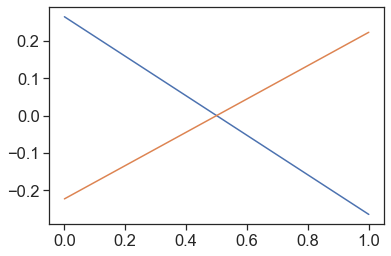

In [1072]:
plt.plot(D1[:,0])
plt.plot(D2[:,0])
#plt.xlim(0,50)

In [1073]:
hat_dims = 4

Uhat1 = U1[:,:hat_dims]
Uhat2 = U2[:,:hat_dims]

In [1074]:
L1.shape

(36, 9)

In [1075]:
I1= Uhat1.T.dot(U1)

In [1076]:
L1 = Uhat1.T.dot(D1)
L2 = Uhat2.T.dot(D2)

ValueError: shapes (4,120) and (2,9) not aligned: 120 (dim 1) != 2 (dim 0)

In [1077]:
L1.shape

(2, 9)

In [1078]:
#test1
#np.allclose(Uhat1.T.dot(D1),(np.dot(I1,S1.dot(Vt1))))

In [1079]:
#L = np.dot(Uhat1,Uhat1.T).dot(S1).dot(Vt1)
#Q1,R1 = Vt1[:,:hat_dims],S1[:hat_dims,:hat_dims]
#Q2,R2 = Vt2[:,:hat_dims],S2[:hat_dims,:hat_dims]

In [1080]:
Q1,R1 = np.linalg.qr(L1.T)
Q2,R2 = np.linalg.qr(L2.T)

In [1081]:
L1.shape

(2, 9)

In [1082]:
#R1[np.abs(R1)<1e-5] = 0
#R2[np.abs(R2)<1e-5] = 0

In [1083]:
#Ub and Vtb are rotation matrices
Ub,Sb,Vtb = np.linalg.svd(np.dot(Q1.T,Q2))

In [1084]:
#These are rotation matricesb

M1 = np.linalg.pinv(R1).dot(Ub)
M2 = np.linalg.pinv(R2).dot(Vtb)

In [1085]:
np.rad2deg(np.arccos(Sb))

/Users/yves/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in arccos
  """Entry point for launching an IPython kernel.


array([           nan, 1.20741827e-06])

ValueError: shapes (36,9) and (36,9) not aligned: 9 (dim 1) != 36 (dim 0)

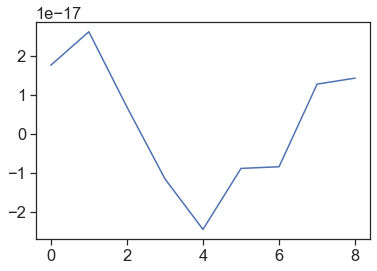

In [1086]:
#yes
plt.plot(np.dot(M1,L1)[0])
plt.plot(np.dot(M2,L2)[0])

In [1087]:
np.dot(M1.T,L1).shape

(2, 9)

In [1088]:
for i in range(hat_dims):
    print(i,np.corrcoef(np.dot(M1.T,L1)[i],np.dot(M2.T,L2)[i])[0,1])
#print(np.corrcoef(np.dot(M1,L1)[1],np.dot(M2,L2)[1])[0,1])


0 0.713564084972457
1 0.8155818099903938


IndexError: index 2 is out of bounds for axis 0 with size 2

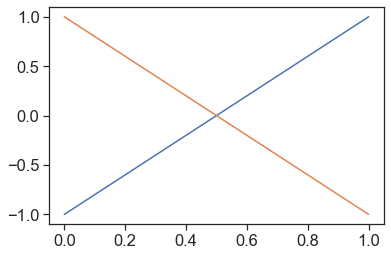

In [1089]:
pred = np.dot(Uhat1,np.dot(M1,L1))
plt.plot(pred[:,0]/np.max(pred[:,0]))
plt.plot(D1[:,0]/np.max(D1[:,0]))

# tut

In [1121]:
import scipy.io as io

In [1122]:
#D1 = io.loadmat('/Users/yves/Desktop/X_n.mat')['X_n']

In [1123]:
"""D1 = np.fromfile(open('/Users/yves/Desktop/U1','rb'),dtype='<d')#.astype("float64")
D1 = D1.reshape((4,-1),order='f')


D2 = np.fromfile(open('/Users/yves/Desktop/U2','rb'),dtype='<d')#.astype("float64")
D2 = D2.reshape((4,-1),order='f')"""

print("Demo data")

Demo data


In [1124]:
D1.dtype

dtype('float64')

In [1125]:
U2

array([[-0.70710678,  0.70710678],
       [ 0.70710678,  0.70710678]])

In [1126]:
U1,S1,V1 = np.linalg.svd(D1)
U2,S2,V2 = np.linalg.svd(D2)

In [1127]:
hat_dims = 36
Uhat1 = U1[:,:hat_dims]
Uhat2 = U2[:,:hat_dims]

In [1128]:
U1.shape

(2, 2)

In [1129]:
prods = U1hat.T@U2hat

In [1099]:
prods

array([[ 0.21853682,  0.45605853],
       [-0.9714862 ,  0.18475813]], dtype=float32)

In [1100]:
Uo,So,Vo = np.linalg.svd(prods)

In [1101]:
So

array([0.999976  , 0.48344263], dtype=float32)

In [1102]:
import math

In [1103]:
math.acos(So[0])

0.006931200186193498

In [1104]:
np.arccos(So[0])

0.0069312

In [1105]:
np.arccos(So)

array([0.0069312, 1.066213 ], dtype=float32)

In [1106]:
np.rad2deg(np.arccos(So))

array([ 0.3971285, 61.0895   ], dtype=float32)

In [1107]:
L1 = np.dot(Uhat1.T,D1)
L2 = np.dot(Uhat2.T,D2)

In [1108]:
np.dot(L1,L2.T)

array([[ 3.44412763e-01,  8.33757045e-18],
       [-5.13107283e-17, -2.06219039e-33]])

In [1109]:
Q1,R1 = np.linalg.qr(L1.T)
Q2,R2 = np.linalg.qr(L2.T)

In [1110]:
R1.shape

(2, 2)

In [1111]:
Ub,Sb,Vb = np.linalg.svd(Q1.T@Q2)

In [1112]:
#np.linalg.inv(R1)

In [1113]:
#np.linalg.inv(R1)

In [1114]:
M1 = np.linalg.pinv(R1)@Ub
M2 = np.linalg.pinv(R2)@Vb

In [1115]:
L1.shape

(2, 9)

In [1116]:
np.dot(M1.T,L1).shape

(2, 9)

In [1117]:
Uf,Sf,Vf = np.linalg.svd(np.dot(M1.T,L1)@np.dot(M2.T,L2).T)

In [1118]:
np.rad2deg(np.arccos(Sf))

array([72.12088013, 90.        ])

In [1119]:
hat_dims

36

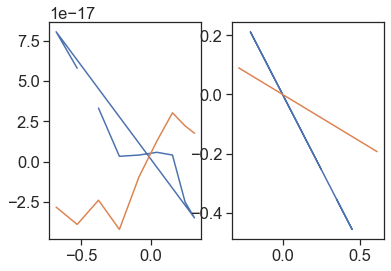

In [1120]:
plt.subplot(1,2,1)
plt.plot(L1[0],L1[1])
plt.plot(L2[0],L2[1])


plt.subplot(1,2,2)
plt.plot(np.dot(M1.T,L1)[0],np.dot(M1.T,L1)[1])
plt.plot(np.dot(M2.T,L2)[0],np.dot(M2.T,L2)[1])


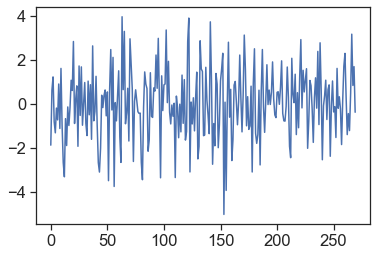

In [918]:
plt.plot(D1.reshape((4,-1),order='f')[0])

In [919]:
M_n = inv(R_n) * U_q;
M_m = inv(R_m) * V_q;

% Use transformation matrices M to carry out the linear transformation of 
% latent variables into the aligned space
L_n_aligned = M_n' * L_n;
L_m_aligned = M_m' * L_m;



SyntaxError: EOL while scanning string literal (<ipython-input-919-956461420a34>, line 6)